## Customer behavior dataset - EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\SAIKRISHNA\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\SAIKRISHNA\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\SAIKRISHNA\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
train_df =  pd.read_csv("customer_data.csv")

In [3]:
train_df

id  age  gender  income   education region loyalty_status  \
0           1   27    Male   40682    Bachelor   East           Gold   
1           2   29    Male   15317     Masters   West        Regular   
2           3   37    Male   38849    Bachelor   West         Silver   
3           4   30    Male   11568  HighSchool  South        Regular   
4           5   31  Female   46952     College  North        Regular   
...       ...  ...     ...     ...         ...    ...            ...   
99995   99996   31  Female   19691     College   West        Regular   
99996   99997   36    Male   17428  HighSchool  South        Regular   
99997   99998   29    Male   13222     College   West        Regular   
99998   99999   31  Female   40093    Bachelor   West        Regular   
99999  100000   35  Female   22249     College   West         Silver   

      purchase_frequency  purchase_amount product_category  promotion_usage  \
0               frequent            18249            Books                0   
1                   rare             4557         Clothing                1   
2                   rare            11822         Clothing                0   
3               frequent             4098             Food                0   
4             occasional            19685         Clothing                1   
...                  ...              ...              ...              ...   
99995         occasional             7075           Health                0   
99996               rare             6873           Health                0   
99997           frequent             5152         Clothing                0   
99998           frequent            16312           Health                1   
99999               rare             9426           Health                0   

       satisfaction_score  
0                       6  
1                       6  
2                       6  
3                       7  
4                       5  
...                   ...  
99995                   7  
99996                   5  
99997                   5  
99998                   5  
99999                   6  

[100000 rows x 12 columns]

In [4]:
train_df.head()

id  age  gender  income   education region loyalty_status  \
0   1   27    Male   40682    Bachelor   East           Gold   
1   2   29    Male   15317     Masters   West        Regular   
2   3   37    Male   38849    Bachelor   West         Silver   
3   4   30    Male   11568  HighSchool  South        Regular   
4   5   31  Female   46952     College  North        Regular   

  purchase_frequency  purchase_amount product_category  promotion_usage  \
0           frequent            18249            Books                0   
1               rare             4557         Clothing                1   
2               rare            11822         Clothing                0   
3           frequent             4098             Food                0   
4         occasional            19685         Clothing                1   

   satisfaction_score  
0                   6  
1                   6  
2                   6  
3                   7  
4                   5

In [5]:
train_df.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


### Checking for null values

In [7]:
train_df.isnull()

id    age  gender  income  education  region  loyalty_status  \
0      False  False   False   False      False   False           False   
1      False  False   False   False      False   False           False   
2      False  False   False   False      False   False           False   
3      False  False   False   False      False   False           False   
4      False  False   False   False      False   False           False   
...      ...    ...     ...     ...        ...     ...             ...   
99995  False  False   False   False      False   False           False   
99996  False  False   False   False      False   False           False   
99997  False  False   False   False      False   False           False   
99998  False  False   False   False      False   False           False   
99999  False  False   False   False      False   False           False   

       purchase_frequency  purchase_amount  product_category  promotion_usage  \
0                   False            False             False            False   
1                   False            False             False            False   
2                   False            False             False            False   
3                   False            False             False            False   
4                   False            False             False            False   
...                   ...              ...               ...              ...   
99995               False            False             False            False   
99996               False            False             False            False   
99997               False            False             False            False   
99998               False            False             False            False   
99999               False            False             False            False   

       satisfaction_score  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False  
...                   ...  
99995               False  
99996               False  
99997               False  
99998               False  
99999               False  

[100000 rows x 12 columns]

In [8]:
train_df.isnull().sum()

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

### Correlation

In [9]:
train_df.corr()

id       age    income  purchase_amount  \
id                  1.000000  0.002121 -0.001513        -0.002438   
age                 0.002121  1.000000 -0.002365        -0.002089   
income             -0.001513 -0.002365  1.000000         0.948441   
purchase_amount    -0.002438 -0.002089  0.948441         1.000000   
promotion_usage     0.004607  0.001932  0.000756         0.001156   
satisfaction_score  0.002390  0.000977  0.002780         0.003424   

                    promotion_usage  satisfaction_score  
id                         0.004607            0.002390  
age                        0.001932            0.000977  
income                     0.000756            0.002780  
purchase_amount            0.001156            0.003424  
promotion_usage            1.000000            0.000330  
satisfaction_score         0.000330            1.000000

<AxesSubplot:>

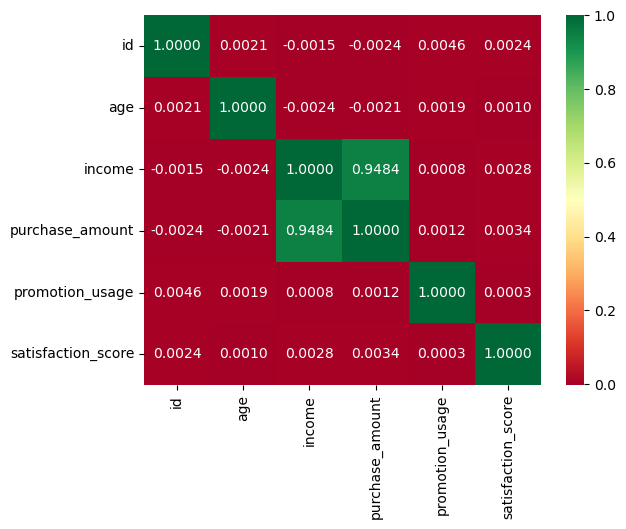

In [10]:
#plt.figure(figsize = (10,10))
sns.heatmap(train_df.corr(),annot=True, fmt=".4f",cmap='RdYlGn')

In [11]:
train_df.describe()

id            age         income  purchase_amount  \
count  100000.000000  100000.000000  100000.000000    100000.000000   
mean    50000.500000      30.003260   27516.269880      9634.790840   
std     28867.657797       4.480535   12996.782587      4799.339449   
min         1.000000      12.000000    5000.000000      1118.000000   
25%     25000.750000      27.000000   16271.750000      5583.000000   
50%     50000.500000      30.000000   27584.500000      9452.000000   
75%     75000.250000      33.000000   38747.250000     13350.000000   
max    100000.000000      49.000000   50000.000000     26204.000000   

       promotion_usage  satisfaction_score  
count    100000.000000       100000.000000  
mean          0.300800            5.009650  
std           0.458608            1.038714  
min           0.000000            0.000000  
25%           0.000000            4.000000  
50%           0.000000            5.000000  
75%           1.000000            6.000000  
max           1.000000           10.000000

In [12]:
train_df.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

### Finding Unique values

In [13]:
train_df['education'].unique()

array(['Bachelor', 'Masters', 'HighSchool', 'College'], dtype=object)

In [14]:
train_df['region'].unique()

array(['East', 'West', 'South', 'North'], dtype=object)

In [15]:
train_df['loyalty_status'].unique()

array(['Gold', 'Regular', 'Silver'], dtype=object)

In [16]:
train_df['product_category'].unique()

array(['Books', 'Clothing', 'Food', 'Electronics', 'Home', 'Beauty',
       'Health'], dtype=object)

In [17]:
train_df['promotion_usage'].unique()

array([0, 1], dtype=int64)

#### Counting each unique value

In [18]:
train_df['education'].value_counts()

College       39874
Bachelor      30279
HighSchool    20031
Masters        9816
Name: education, dtype: int64

### College people do more online shopping

In [19]:
train_df['region'].value_counts()

East     30074
West     29935
South    20073
North    19918
Name: region, dtype: int64

In [20]:
train_df['loyalty_status'].value_counts()

Regular    60138
Silver     29964
Gold        9898
Name: loyalty_status, dtype: int64

In [21]:
train_df['product_category'].value_counts()

Electronics    30027
Clothing       19989
Books          14925
Food           14822
Health         10123
Home            5079
Beauty          5035
Name: product_category, dtype: int64

### Electronics is the most bought by customers

In [22]:
train_df['satisfaction_score'].unique()

array([ 6,  7,  5,  3,  4,  2,  8,  9,  1, 10,  0], dtype=int64)

In [23]:
train_df['satisfaction_score'].value_counts()

5     38490
6     24315
4     23854
7      6123
3      6018
8       616
2       534
9        30
1        18
10        1
0         1
Name: satisfaction_score, dtype: int64

#### Most given  rating is 5/10

### DATA VIZ

In [24]:
import plotly.express as px

C:\Users\SAIKRISHNA\AppData\Local\Temp\ipykernel_13356\710453314.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['income'])


<AxesSubplot:xlabel='income', ylabel='Density'>

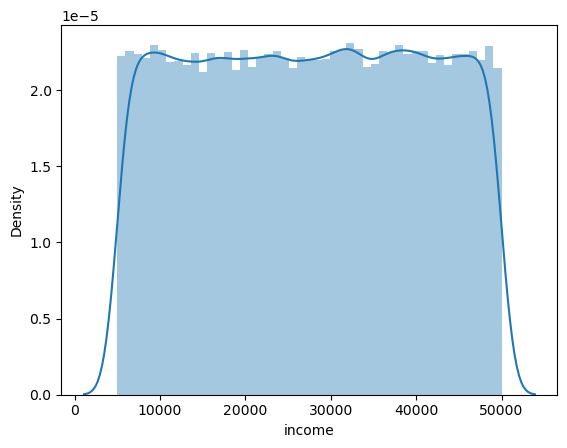

In [25]:
sns.distplot(train_df['income'])

<AxesSubplot:xlabel='income', ylabel='Count'>

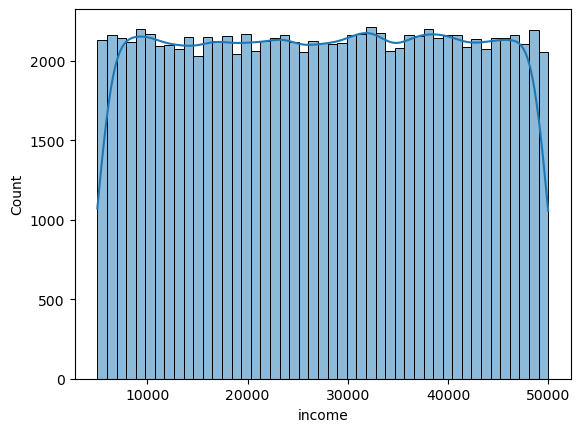

In [26]:
sns.histplot(train_df['income'],kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

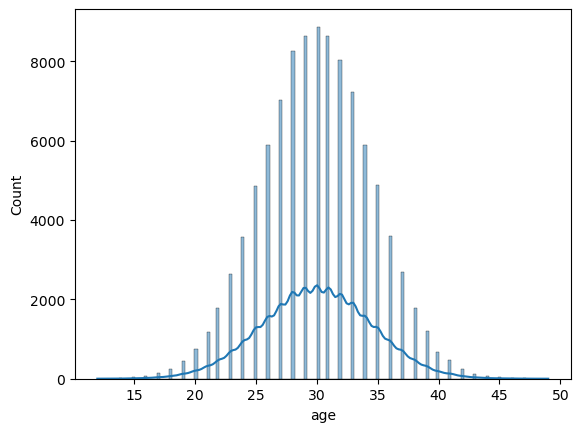

In [27]:
sns.histplot(train_df['age'],kde=True)

<AxesSubplot:xlabel='purchase_amount', ylabel='Count'>

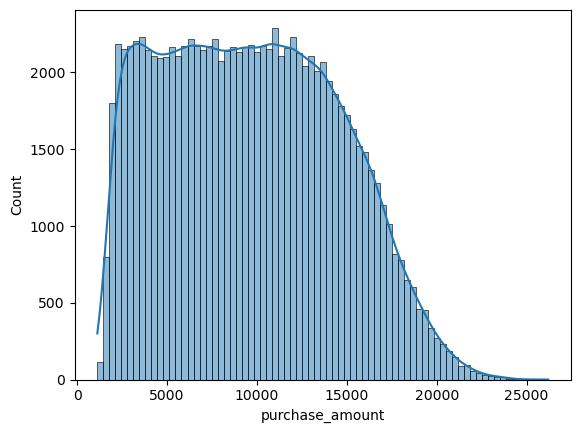

In [28]:
sns.histplot(train_df['purchase_amount'],kde=True)

C:\Users\SAIKRISHNA\AppData\Local\Temp\ipykernel_13356\3588613568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['purchase_amount'])


<AxesSubplot:xlabel='purchase_amount', ylabel='Density'>

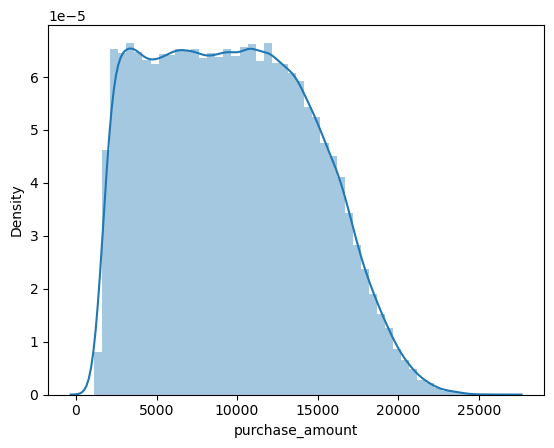

In [29]:
sns.distplot(train_df['purchase_amount'])

(array([30279.,     0.,     0.,  9816.,     0.,     0., 20031.,     0.,
            0., 39874.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

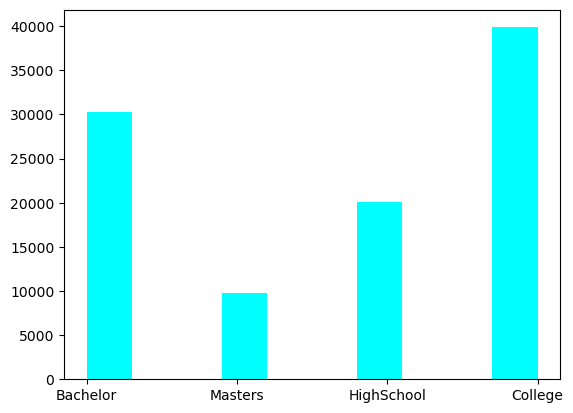

In [30]:
plt.hist(train_df['education'],color='cyan')

<AxesSubplot:xlabel='education', ylabel='Count'>

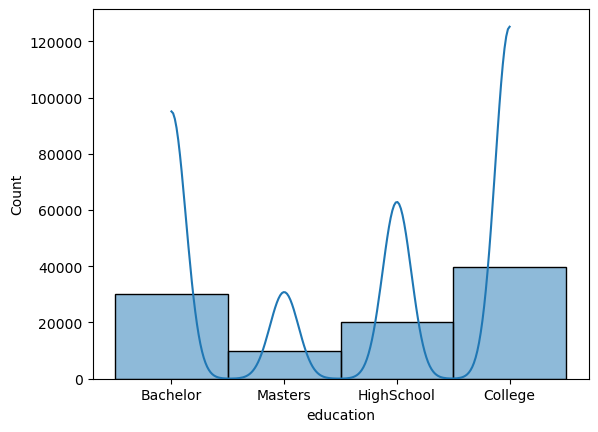

In [31]:
sns.histplot(train_df['education'],kde=True)

Text(0.5, 1.0, 'Income of Customers')

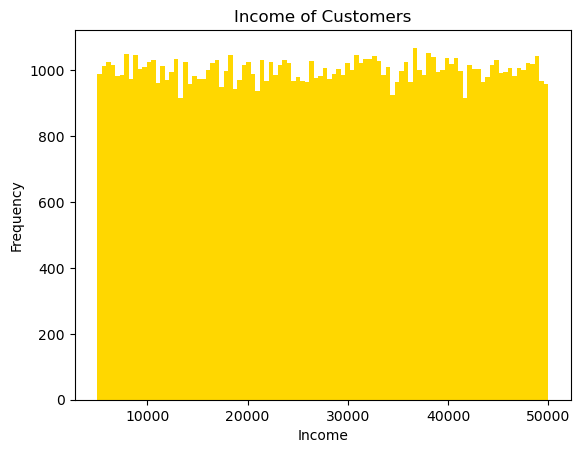

In [32]:
plt.hist(train_df['income'],bins=100,color='gold')
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Income of Customers")

Text(0.5, 1.0, 'Purchase value of Products')

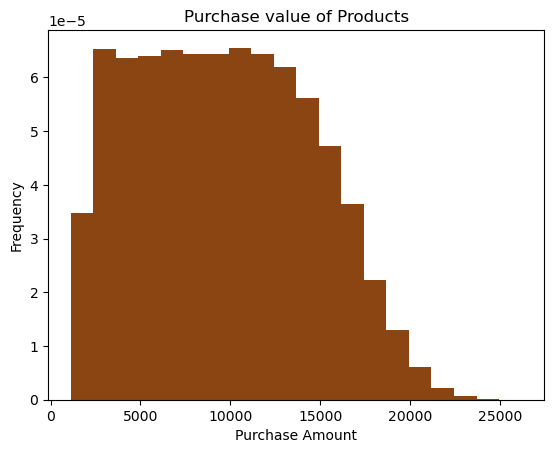

In [33]:
plt.hist(train_df['purchase_amount'],bins=20,density=True,color='saddlebrown')
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.title("Purchase value of Products")

Text(0.5, 1.0, 'Age of Customers')

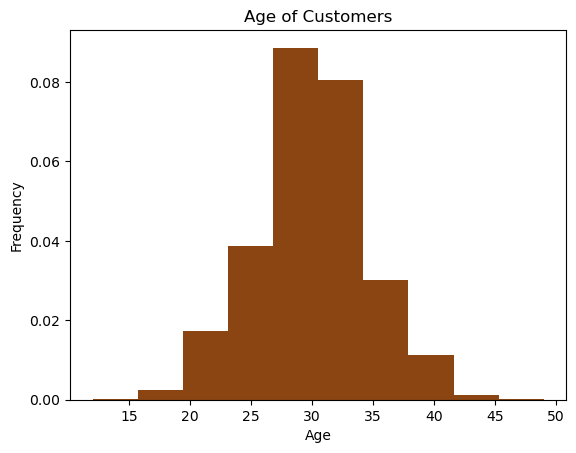

In [34]:
plt.hist(train_df['age'],bins=10,density=True,color='saddlebrown')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age of Customers")

In [35]:
train_df.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

In [36]:
df=train_df['product_category'].value_counts()
product_names=train_df.product_category.value_counts().index

In [37]:
df

Electronics    30027
Clothing       19989
Books          14925
Food           14822
Health         10123
Home            5079
Beauty          5035
Name: product_category, dtype: int64

In [38]:
product_names

Index(['Electronics', 'Clothing', 'Books', 'Food', 'Health', 'Home', 'Beauty'], dtype='object')

([<matplotlib.patches.Wedge at 0x18ffe4264f0>,
 [Text(0.6458087139958407, 0.8904667904683693, 'Electronics'),
  Text(-0.89079128419137, 0.6453610524417245, 'Clothing'),
  Text(-0.9807809182651045, -0.49806504632132004, 'Books'),
  Text(-0.18217344386703813, -1.0848100462060735, 'Food'),
  Text(0.6367115348897864, -0.8969941032907032, 'Health'),
  Text(0.977758819677844, -0.5039719144378878, 'Home'),
  Text(1.0862673087941428, -0.17327242667294304, 'Beauty')],
 [Text(0.3522592985431858, 0.48570915843729223, '30.03%'),
  Text(-0.48588615501347443, 0.3520151195136679, '19.99%'),
  Text(-0.5349714099627843, -0.2716718434479927, '14.93%'),
  Text(-0.09936733301838442, -0.5917145706578583, '14.82%'),
  Text(0.34729720084897436, -0.48926951088583803, '10.12%'),
  Text(0.5333229925515511, -0.2748937715115751, '5.08%'),
  Text(0.5925094411604415, -0.09451223273069619, '5.03%')])

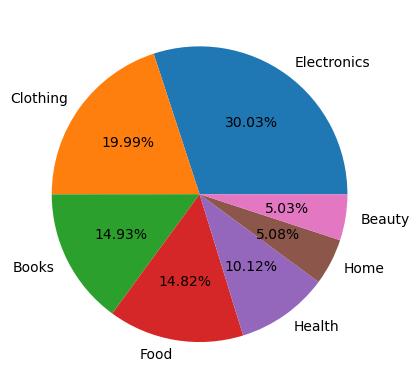

In [39]:
plt.pie(df,labels=product_names,autopct='%1.2f%%')

In [40]:
df1= train_df['satisfaction_score'].value_counts()

In [41]:
df1

5     38490
6     24315
4     23854
7      6123
3      6018
8       616
2       534
9        30
1        18
10        1
0         1
Name: satisfaction_score, dtype: int64

In [42]:
score_labels= train_df.satisfaction_score.value_counts().index

([<matplotlib.patches.Wedge at 0x18ffe725520>,
 [Text(0.38914556334693057, 1.0288662354880735, '5'),
  Text(-1.0990897885806075, -0.04473965397536765, '6'),
  Text(-0.018521980115833437, -1.099844050878391, '4'),
  Text(0.8784273930882249, -0.6620916213578188, '7'),
  Text(1.061757369149593, -0.28752615369133894, '3'),
  Text(1.0982728143937988, -0.061618383324496734, '8'),
  Text(1.099781813353686, -0.021908058254398136, '2'),
  Text(1.0999973400566159, -0.002419063531629972, '9'),
  Text(1.0999997372441308, -0.0007603044411973157, '1'),
  Text(1.0999999951108628, -0.0001037116284233118, '10'),
  Text(1.0999999994559435, -3.459659193845739e-05, '0')],
 [Text(0.21226121637105302, 0.5611997648116764, '38.49%'),
  Text(-0.5995035210439676, -0.02440344762292781, '24.31%'),
  Text(-0.010102898245000056, -0.5999149368427588, '23.85%'),
  Text(0.47914221441175897, -0.3611408843769921, '6.12%'),
  Text(0.5791403831725052, -0.15683244746800304, '6.02%'),
  Text(0.5990578987602538, -0.033610027

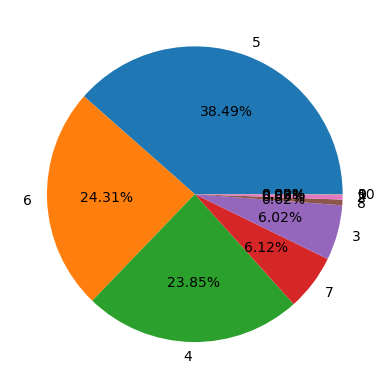

In [43]:
plt.pie(df1,labels=score_labels,autopct="%1.2f%%")

In [44]:
df2= train_df['education'].value_counts()
education_level= train_df.education.value_counts().index

([<matplotlib.patches.Wedge at 0x18ffe625f40>,
 [Text(0.3440571763896721, 1.0448084319025983, 'College'),
  Text(-1.0458734909767151, -0.34080586977365757, 'Bachelor'),
  Text(0.3509752196263701, -1.042504865795945, 'HighSchool'),
  Text(1.0481095590434533, -0.3338657697963932, 'Masters')],
 [Text(0.18766755075800293, 0.5698955083105081, '39.87%'),
  Text(-0.5704764496236627, -0.18589411078563137, '30.28%'),
  Text(0.19144102888711098, -0.5686390177068791, '20.03%'),
  Text(0.5716961231146108, -0.18210860170712354, '9.82%')])

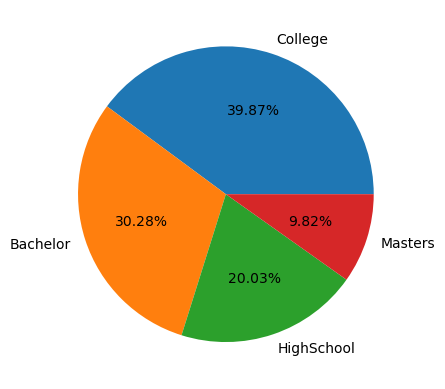

In [45]:
plt.pie(df2,labels=education_level,autopct="%1.2f%%")

In [46]:
train_df.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

In [47]:
df3=train_df['gender'].value_counts()
gender_label=train_df.gender.value_counts().index

([<matplotlib.patches.Wedge at 0x18ffe685880>,
 [Text(-0.002557225312526664, 1.0999970275408482, 'Female'),
  Text(0.0025572253125262854, -1.0999970275408482, 'Male')],
 [Text(-0.0013948501704690894, 0.5999983786586444, '50.07%'),
  Text(0.0013948501704688827, -0.5999983786586444, '49.93%')])

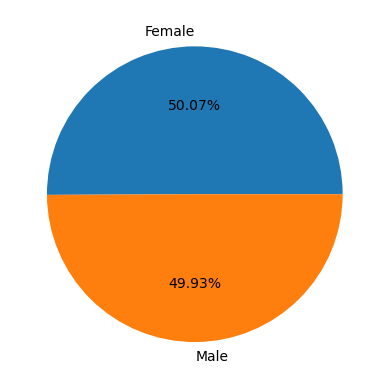

In [48]:
plt.pie(df3,labels=gender_label,autopct="%1.2f%%")

In [49]:
df4=train_df['loyalty_status'].value_counts()
loyalty_labels=train_df.loyalty_status.value_counts().index

([<matplotlib.patches.Wedge at 0x18ffe6de1c0>,
 [Text(-0.3444509834113279, 1.0446786683123999, 'Regular'),
  Text(0.008293660441586404, -1.099968733735864, 'Silver'),
  Text(1.0472460207036294, -0.33656466261390783, 'Gold')],
 [Text(-0.18788235458799704, 0.5698247281703999, '60.14%'),
  Text(0.004523814786319856, -0.5999829456741075, '29.96%'),
  Text(0.5712251022019796, -0.18358072506213152, '9.90%')])

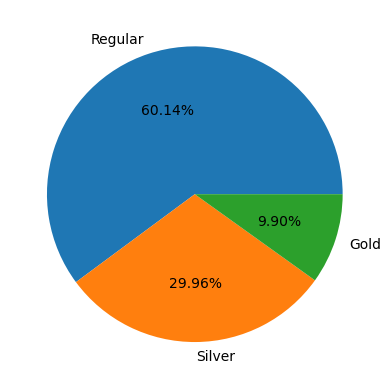

In [50]:
plt.pie(df4,labels=loyalty_labels,autopct="%1.2f%%")

In [51]:
df7=train_df['purchase_frequency'].value_counts()
frequency_labels=train_df.purchase_frequency.value_counts().index

([<matplotlib.patches.Wedge at 0x18ffe8af0a0>,
 [Text(-0.0006566605844058636, 1.099999803998563, 'rare'),
  Text(-0.64868656463869, -0.8883725236955805, 'occasional'),
  Text(0.8879851835515262, -0.6492166924786843, 'frequent')],
 [Text(-0.00035817850058501654, 0.5999998930901252, '50.02%'),
  Text(-0.3538290352574673, -0.4845668311066802, '29.89%'),
  Text(0.4843555546644688, -0.3541181958974641, '20.09%')])

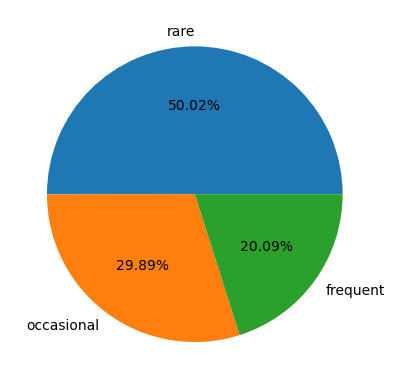

In [52]:
plt.pie(df7,labels=frequency_labels,autopct="%1.2f%%")

In [53]:
train_df.groupby(["income",'purchase_amount','product_category','purchase_frequency']).size()

income  purchase_amount  product_category  purchase_frequency
5000    1620             Electronics       occasional            1
        1757             Health            rare                  1
        1834             Clothing          rare                  1
5001    1445             Health            frequent              1
        1562             Books             rare                  1
                                                                ..
49997   16323            Beauty            rare                  1
        17770            Food              rare                  1
49998   15721            Food              rare                  1
49999   11518            Electronics       occasional            1
50000   16837            Books             occasional            1
Length: 99996, dtype: int64

In [54]:
purchase_regions=train_df.groupby('region')['purchase_amount'].mean().idxmax()
fig=px.bar(train_df.groupby('region')['purchase_amount'].mean().reset_index(),x='region',y='purchase_amount',title='Average purchase in regions')
fig.show()
print(f" The region with high average purchase is {purchase_regions}")

 The region with high average purchase is North


In [55]:
income_region=train_df.groupby('region')['income'].mean()
print(f" The region with high average income is {income_region}")

 The region with high average income is region
East     27467.802853
North    27670.206848
South    27591.942460
West     27411.793686
Name: income, dtype: float64


In [56]:
income_regions=train_df.groupby('region')['income'].mean().idxmax()
fig=px.bar(train_df.groupby('region')['income'].mean().reset_index(),x='region',y='income',title='Average income in regions')
fig.show()
print(f" The region with high average income is {income_regions}")

 The region with high average income is North


### High average income region as well purchase is North Region

In [57]:
product_values=train_df.groupby('product_category')['purchase_amount'].mean()
print(f" The product with high average purchase is {product_values}")

 The product with high average purchase is product_category
Beauty         9721.366038
Books          9592.935678
Clothing       9634.595327
Electronics    9648.226696
Food           9669.953110
Health         9610.963647
Home           9538.173262
Name: purchase_amount, dtype: float64


In [58]:
products=train_df.groupby('product_category')['purchase_amount'].mean().idxmax()
fig=px.bar(train_df.groupby('product_category')['purchase_amount'].mean().reset_index(),x='product_category',y='purchase_amount',title='Average purchase amount category wise')
fig.show()
print(f" The product with high average purchase is {products}")

 The product with high average purchase is Beauty


In [59]:
education_income_ave=train_df.groupby('education')['income'].mean()
print(f" The product with high average purchase is {education_income_ave}")

 The product with high average purchase is education
Bachelor      27555.371644
College       27544.391333
HighSchool    27423.473616
Masters       27470.785452
Name: income, dtype: float64


In [60]:
education_income=train_df.groupby('education')['income'].mean().idxmax()
fig=px.bar(train_df.groupby('education')['income'].mean().reset_index(),x='education',y='income',title='Average income of different educational categories')
fig.show()
print(f" The product with high average purchase is {education_income}")

 The product with high average purchase is Bachelor


In [61]:
train_df.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

In [62]:
df8 = train_df.sort_values(by='income', ascending=False)

highest_income_row = df8.iloc[0]
education_level = highest_income_row['education']
product_cat = highest_income_row['product_category']
income_person = highest_income_row['income']

print(f"The person with the highest income in INR has a degree in {education_level} and has bought in the category of {product_cat}  with a income of {income_person}Rs.")

The person with the highest income in INR has a degree in Masters and has bought in the category of Books  with a income of 50000Rs.


In [63]:
education_cate = df8['education'].head(5)
income_top = df8['income'].head(5)

In [64]:
education_cate

93803     Masters
70108    Bachelor
58036    Bachelor
36757     College
23610     Masters
Name: education, dtype: object

In [65]:
income_top

93803    50000
70108    49999
58036    49998
36757    49997
23610    49997
Name: income, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


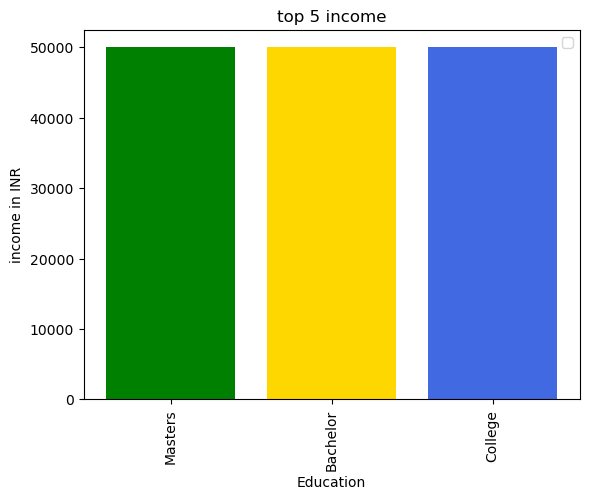

In [66]:
colors=['cyan','violet','gold','royalblue','green']
plt.bar(education_cate,income_top,color=colors)
plt.title('top 5 income')
plt.xlabel('Education')
plt.ylabel('income in INR')
plt.xticks(rotation=90)
plt.legend()

In [67]:
df9 = train_df.sort_values(by='purchase_amount', ascending=False)

highest_purchase_amt = df9.iloc[0]
education_lvl = highest_purchase_amt['education']
product_cgy = highest_purchase_amt['product_category']
inc = highest_purchase_amt['income']
purchased_val=highest_purchase_amt['purchase_amount']

print(f"The person with the highest purchase amount in INR has a degree in {education_lvl} and has bought in the cat of {product_cgy} for Rs.{purchased_val} with a income of {inc}Rs.")

The person with the highest purchase amount in INR has a degree in Bachelor and has bought in the cat of Clothing for Rs.26204 with a income of 49710Rs.


In [68]:
purchased_val

26204

In [69]:
product_cat = df9['product_category'].head(5)
purchase_top = df9['purchase_amount'].head(5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


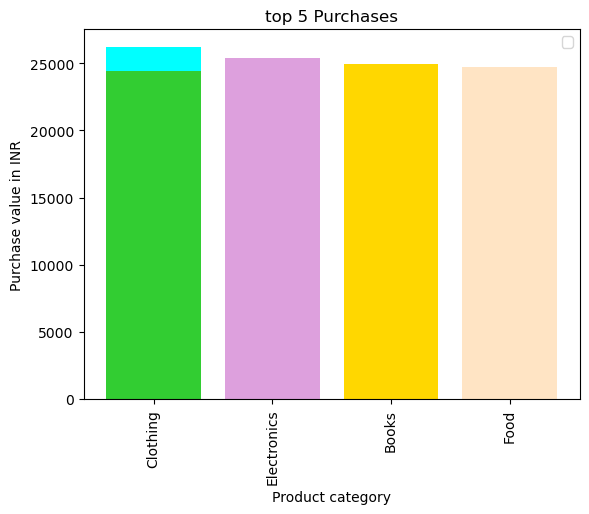

In [70]:
colors=['cyan','plum','gold','bisque','limegreen']
plt.bar(product_cat,purchase_top,color=colors)
plt.title('top 5 Purchases')
plt.xlabel('Product category')
plt.ylabel('Purchase value in INR')
plt.xticks(rotation=90)
plt.legend()

In [71]:
product_cat

91489       Clothing
72791    Electronics
73920          Books
39384           Food
83255       Clothing
Name: product_category, dtype: object

In [72]:
purchase_top

91489    26204
72791    25406
73920    24967
39384    24751
83255    24408
Name: purchase_amount, dtype: int64

Text(0.5, 1.0, 'Income vs Purchase')

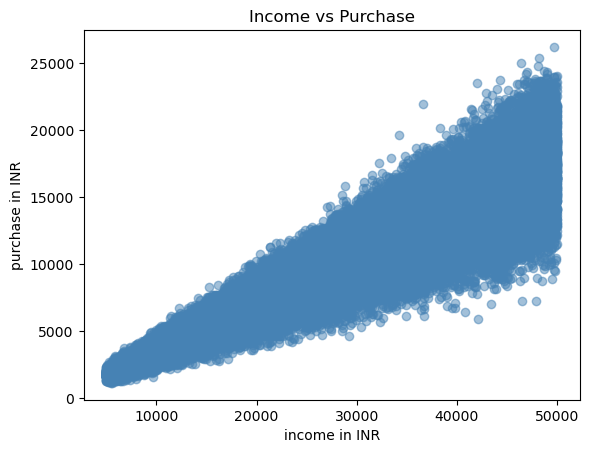

In [73]:
plt.scatter(train_df['income'],train_df['purchase_amount'],color='steelblue',alpha=0.5)
plt.xlabel('income in INR')
plt.ylabel('purchase in INR')
plt.title('Income vs Purchase')

### Clearly we can see that more the income, more amount was spent to purchase

In [74]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [75]:
loyalty_status_counts = train_df.groupby(['region', 'loyalty_status'])['loyalty_status'].size()
loyalty_status_counts

region  loyalty_status
East    Gold               2998
        Regular           18102
        Silver             8974
North   Gold               1994
        Regular           11932
        Silver             5992
South   Gold               1973
        Regular           12077
        Silver             6023
West    Gold               2933
        Regular           18027
        Silver             8975
Name: loyalty_status, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'East'),
  Text(1, 0, 'North'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

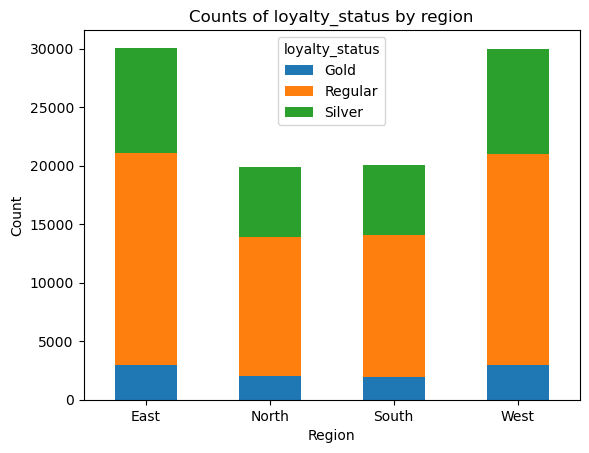

In [76]:
loyalty_status_counts.unstack().plot(kind='bar', stacked=True)
plt.title('Counts of loyalty_status by region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='loyalty_status')
plt.xticks(rotation=0)

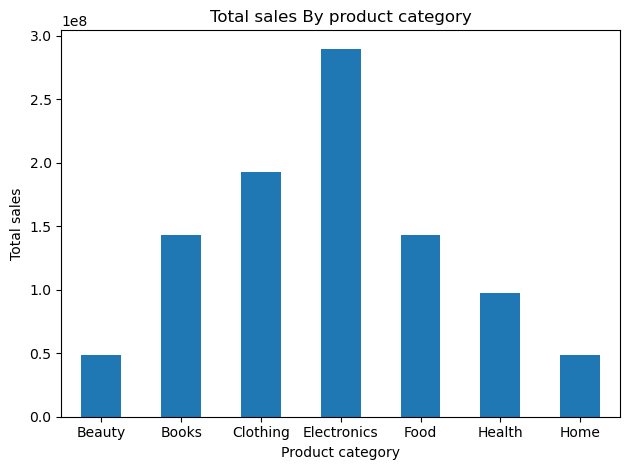

In [77]:
train_df.groupby('product_category')['purchase_amount'].sum().plot(kind='bar')
plt.title('Total sales By product category')
plt.xlabel('Product category')
plt.ylabel('Total sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Purchase and Income Distribution')

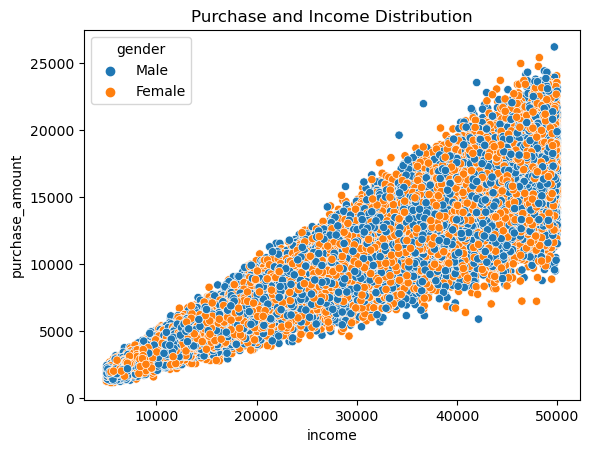

In [78]:
sns.scatterplot(data=train_df,x='income',y='purchase_amount',hue='gender')
plt.title('Purchase and Income Distribution')

<AxesSubplot:>

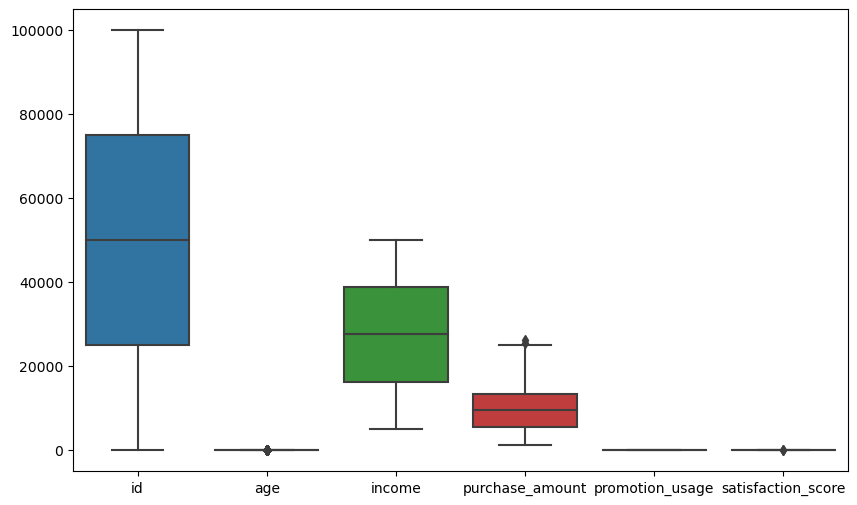

In [79]:
## Checking Outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=train_df)

Text(0.5, 1.0, 'Income by Age')

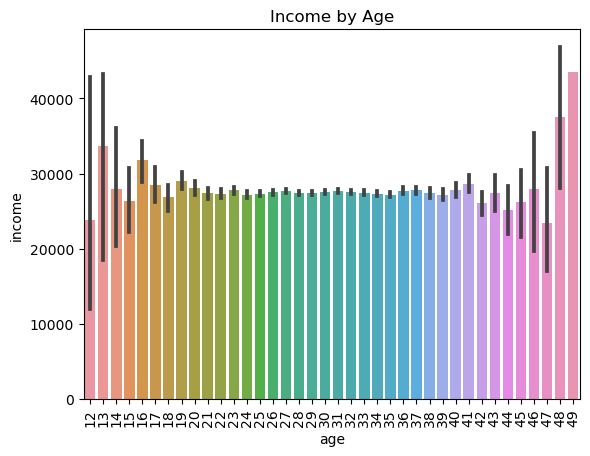

In [80]:
sns.barplot(x='age', y='income', data=train_df)
plt.xticks(rotation=90)
plt.title('Income by Age')

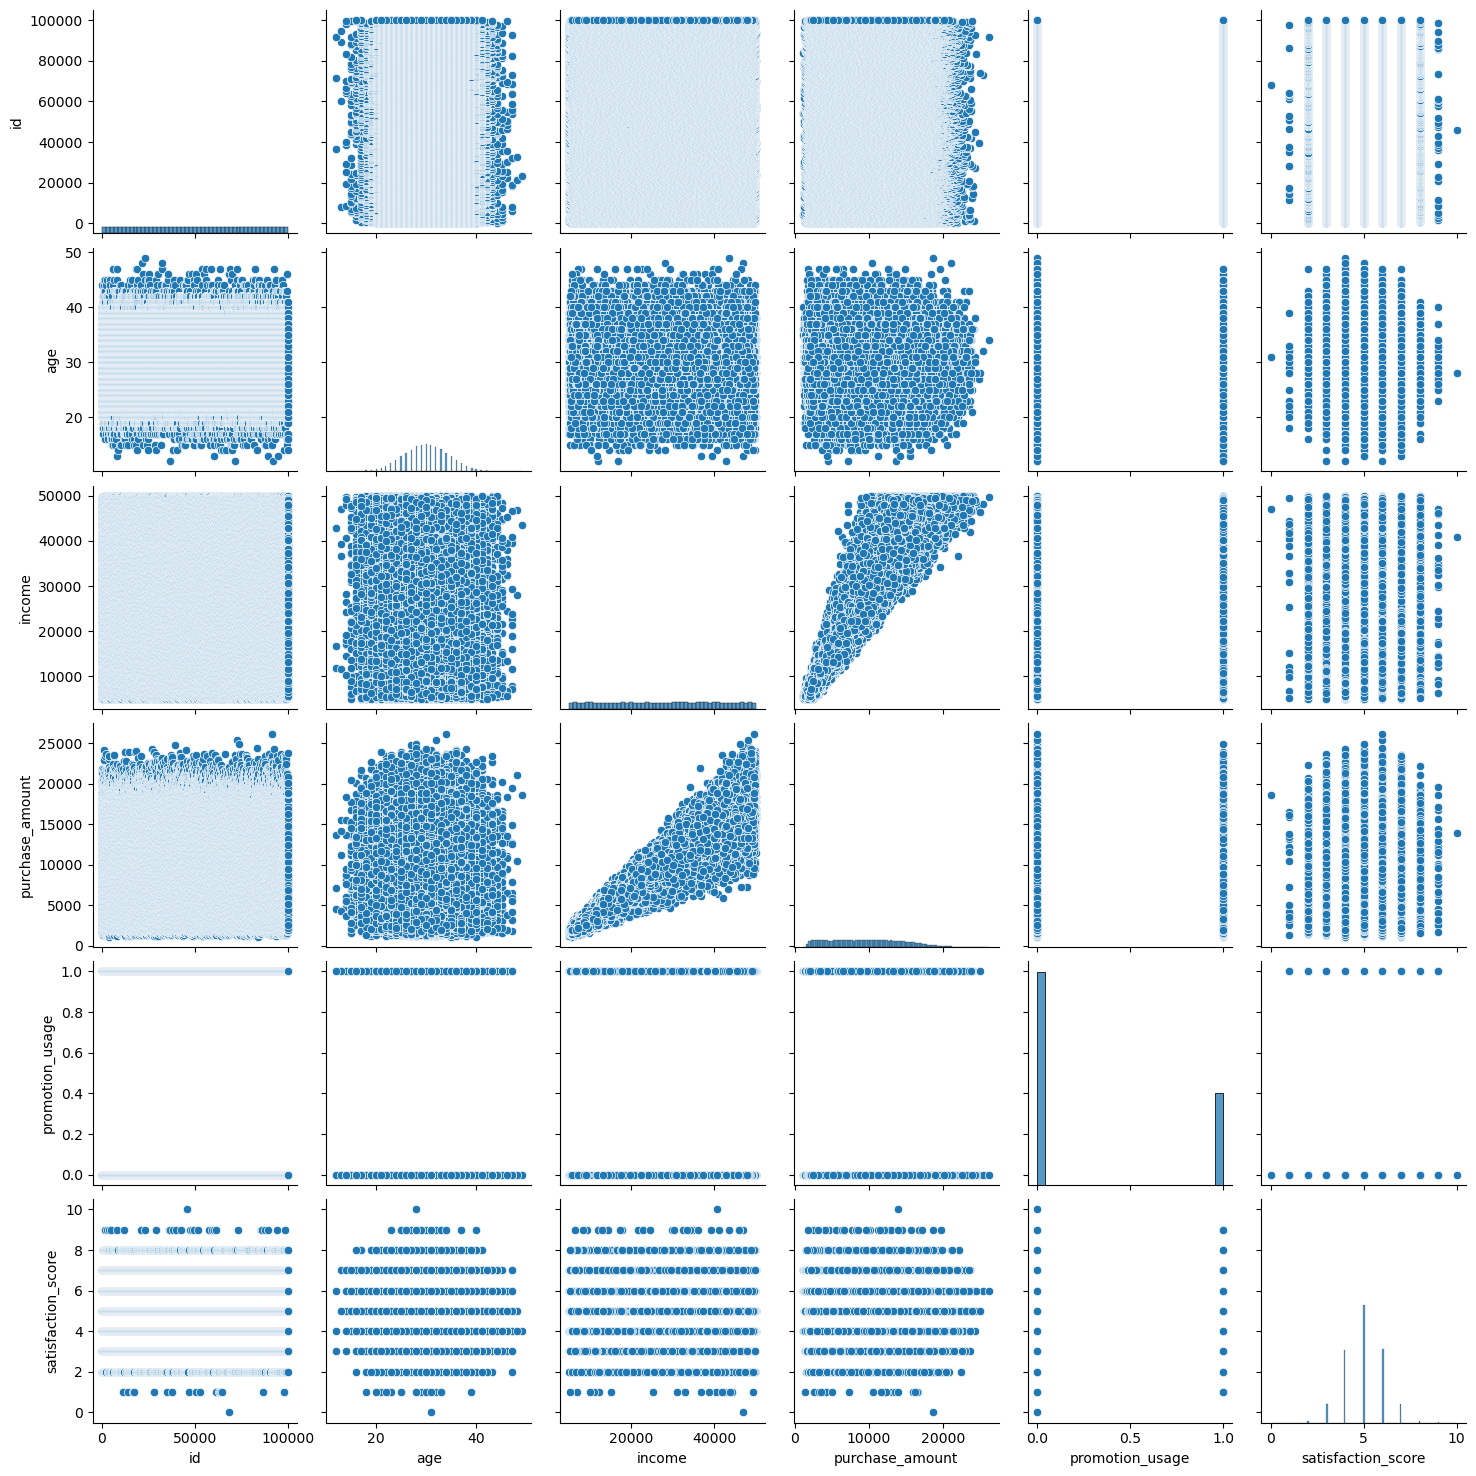

In [81]:
sns.pairplot(train_df)